# Enjins Machine Learning Case

In [6]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('case_data.csv', sep=';', encoding ='latin1')

# explore data

In [4]:
df.head()

,country_portal,total_delay_known,total_delay,submission_time,validation_time,claim_validated_yn,claim_validated_positive_yn,claim_validated_negative_yn,pf_earlier_claims_total,pf_earlier_claims_pos,...,perc_cancelled_dep_4h,perc_delayed_calc_15_dep_4h,perc_delayed_calc_30_dep_4h,perc_delayed_calc_45_dep_4h,n_arr_4h,perc_cancelled_arr_4h,perc_delayed_calc_15_arr_4h,perc_delayed_calc_30_arr_4h,perc_delayed_calc_45_arr_4h,description
0,nl_NL,0.0,NaN,01/01/2018 00:11,02/01/2018 14:42,1.0,0.0,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bij het inchecken om 17.15 kreeg ik te horen d...
1,fr_FR,1.0,199.0,01/01/2018 01:31,03/01/2018 09:48,1.0,1.0,0.0,7.0,7.0,...,0.0000,0.1000,0.0500,0.0500,15.0,0.0000,0.0000,0.0000,0.0000,NaN
2,nl_BE,0.0,NaN,01/01/2018 03:41,15/01/2018 09:30,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We kregen te horen dat het vliegtuig niet kon ...
3,nl_NL,0.0,NaN,01/01/2018 05:12,15/01/2018 14:58,1.0,0.0,1.0,0.0,0.0,...,0.0053,0.0957,0.0372,0.0266,368.0,0.0109,0.1033,0.0598,0.0272,"Peking -> Guangzhou: 1,5 uur tijd voor oversta..."
4,en_US,1.0,210.0,01/01/2018 06:58,03/01/2018 15:22,1.0,1.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.0000,0.0000,0.0000,Event details:\r\n\r\nOn Thursday 20/4/2017 at...


In [28]:
# I notice the submission_time and validation_time. They need to be manipulated into year, month, day columns.
# country portal needs to be checked for EU locations.

In [9]:
df.dtypes

country_portal                  object
total_delay_known              float64
total_delay                    float64
submission_time                 object
validation_time                 object
claim_validated_yn             float64
claim_validated_positive_yn    float64
claim_validated_negative_yn    float64
pf_earlier_claims_total        float64
pf_earlier_claims_pos          float64
pf_earlier_claims_neg          float64
pf_flight_status                object
pf_operating_airline_name       object
f2_is_missed_connection        float64
reason                          object
cust_problem                    object
nr_flights_booked              float64
nr_flights_alternative         float64
n_dep_4h                       float64
perc_cancelled_dep_4h          float64
perc_delayed_calc_15_dep_4h    float64
perc_delayed_calc_30_dep_4h    float64
perc_delayed_calc_45_dep_4h    float64
n_arr_4h                       float64
perc_cancelled_arr_4h          float64
perc_delayed_calc_15_arr_

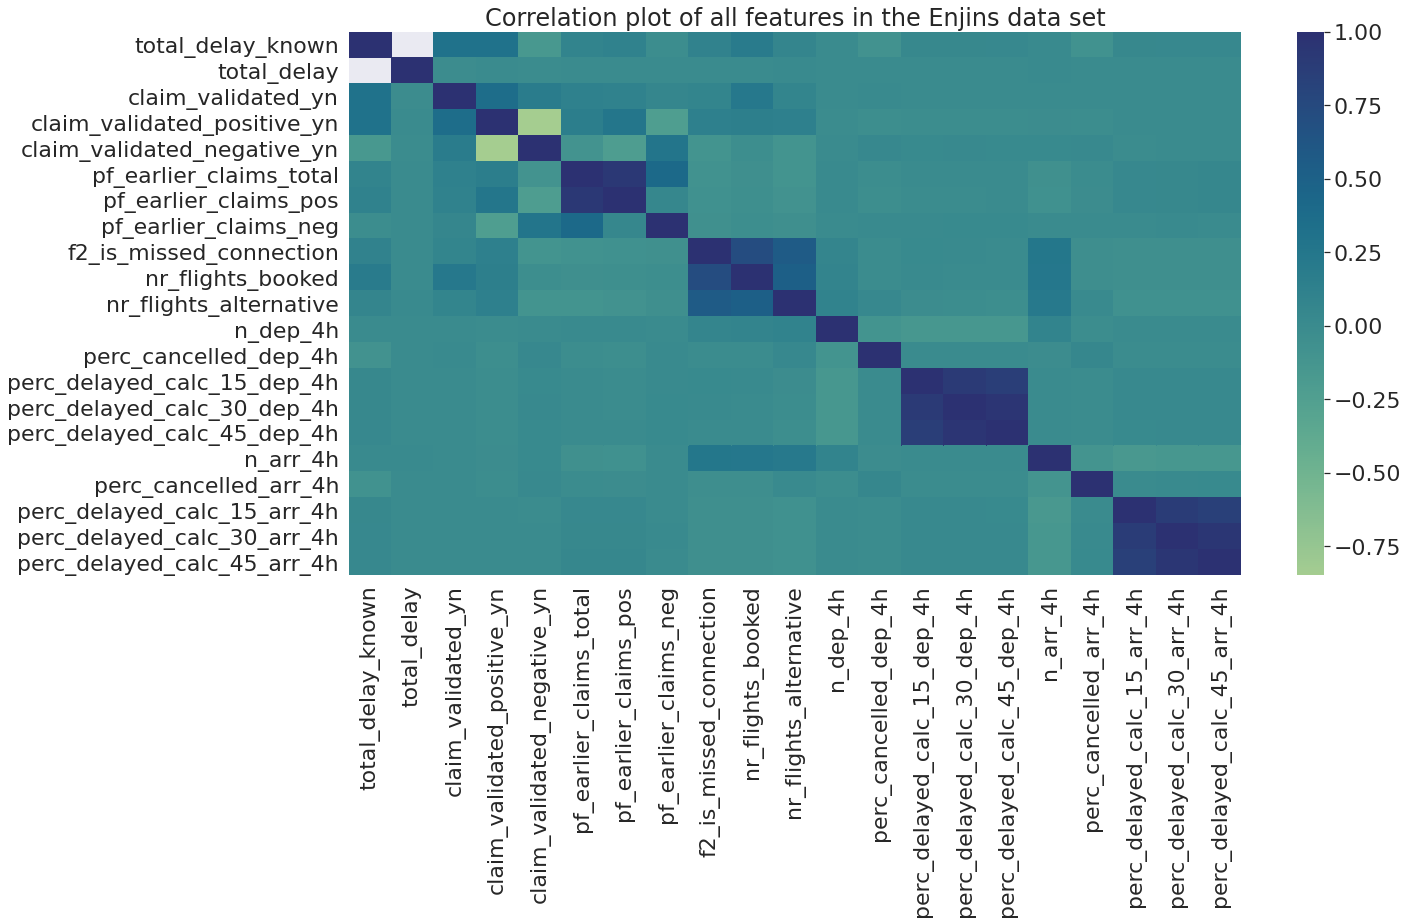

In [8]:
# look for features which correlate
df_corr = df.corr()
sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, cmap='crest')
plt.title('Correlation plot of all features in the Enjins data set')
plt.show()

In [ ]:
# we see most features do not correlate
# 4 sets of feature do correlate

# 1
# f2_is_missed_connection
# nr_flights_alternative
# nr_flights_booked

# 2 
# perc_delayed_calc_15_dep_4h    (measure same thing for different time periods)
# perc_delayed_calc_30_dep_4h
# perc_delayed_calc_45_dep_4h

# 3
# perc_delayed_calc_15_arr_4h    (measure same thing for different time periods)
# perc_delayed_calc_30_arr_4h
# perc_delayed_calc_45_arr_4h

# 4
# claim_validated_positive_yn    (these features are exact opposites of eachother.)
# claim_validated_negitive_yn

<AxesSubplot:>

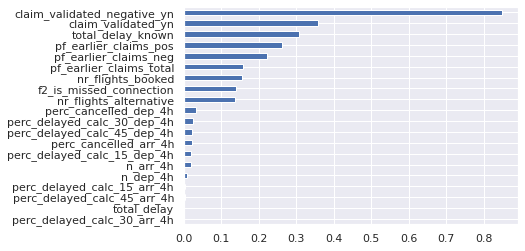

In [39]:
#this plot shows the features with the highest correlation with the chosen target (claim_validated_positive_yn)
sns.set()
(abs(df_corr)
 .claim_validated_positive_yn
 .drop('claim_validated_positive_yn')
 .sort_values()
 .plot
 .barh())

In [29]:
# check for missing data
print (df.shape)
df.apply(lambda x: sum(x.isnull()))

(97678, 29)


country_portal                  6688
total_delay_known               6688
total_delay                    24217
submission_time                 6688
validation_time                13360
claim_validated_yn              6688
claim_validated_positive_yn     6688
claim_validated_negative_yn     6688
pf_earlier_claims_total         6688
pf_earlier_claims_pos           6688
pf_earlier_claims_neg           6688
pf_flight_status               13660
pf_operating_airline_name      11160
f2_is_missed_connection         6688
reason                          6688
cust_problem                    6688
nr_flights_booked               6688
nr_flights_alternative          6688
n_dep_4h                       15940
perc_cancelled_dep_4h          15940
perc_delayed_calc_15_dep_4h    15940
perc_delayed_calc_30_dep_4h    15940
perc_delayed_calc_45_dep_4h    15940
n_arr_4h                       18143
perc_cancelled_arr_4h          18143
perc_delayed_calc_15_arr_4h    18143
perc_delayed_calc_30_arr_4h    18143
p

<AxesSubplot:>

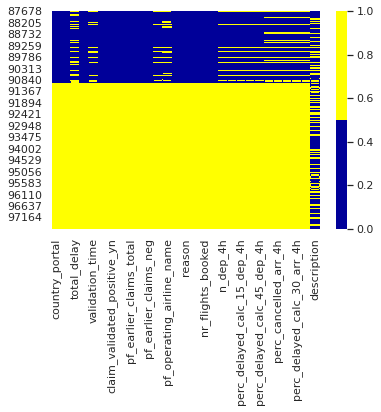

In [16]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.set(font_scale = 1)
sns.heatmap(df[87678:97678].isnull(), cmap=sns.color_palette(colours))
# very quick and dirty plot which shows missing data as yellow. It starts from row 87678 until the end.
# basically all features have missing data starting from arround 91014

In [27]:
print('Overview of the categorical features in the data set')
print('---')
print('unique flight status categories: ', list(set(df.pf_flight_status)))
print('---')
print('unique operating airline name count: ', len(set(df.pf_operating_airline_name)))
print('---')
print('unique reasons for problem with flight count: ', len(set(df.reason)))
print('---')
print('unique problems indicated by customer categories: ', list(set(df.cust_problem)))

Overview of the categorical features in the data set
---
unique flight status categories:  [nan, 'canceled', 'Departed', 'arrived', 'scheduled', 'NS', 'delayed', 'diverted', 'on time']
---
unique operating airline name count:  402
---
unique reasons for problem with flight count:  12
---
unique problems indicated by customer categories:  [nan, 'flight_canceled', 'flight_delayed', 'denied_boarding', 'flight_rerouted']


### Summary of data exploration
- completely missing all data after around row 91014 (this needs to all be removed)
- split the two date/time features up in year,month,day
- Change 'total_delay' feature Nah values to 0
- remove features which correlate too highly
- remove 'description' feature. Might contain relevant info which could be extracted using NLP.
    - might be best to add a boelean feature which contains a 1 if the customer added a description.
- country_portal: possibly best to change to a boolean feature wich is 1 if country is within EU.
- remove 'claims_validated_negative_yn'  as it is the opposite of the target

## Metric and Model Selection
The metric I will optimize for is 'claims_validated_positive_yn'.
The reason is that this feature is 1 if the claim is validated positive. We want to predict of claims are validated positively. 

It is also possible to optimize for the negative. There will be more examples of claims being validated negatively. It needs to be tested if this would improve predictions.

- We have a discrete target variable, instead of continues (either yes (1) or no (0)).
- Thus we need a classification model.
    - most common models in this case are either Logistic Regression or K nearest neigbors
- Since Logistic Regression isoften used when predicting a multi-class target I proposue using KKN.

In [45]:
col_to_keep = ['total_delay_known','pf_earlier_claims_pos', 'pf_earlier_claims_total', 'nr_flights_booked', 'f2_is_missed_connection','nr_flights_alternative']
df1 = df[col_to_keep]
target = df['claim_validated_positive_yn']

#which_col_to_keep = abs(df_corr).claim_validated_positive_yn.drop('claim_validated_positive_yn').sort_values(ascending = False).index[0:9]
# whcih_col_to_keep.head(10)
#df1 = pd.DataFrame(df1)
target = target.head(90476)
df1 = df1.head(90476)
df1.shape


(90476, 6)

In [63]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from math import sqrt

In [64]:
# create and train the KKN model
X_train, X_val, y_train, y_val = train_test_split(df1, target, train_size=0.8)
# knn_model = LinearRegression(n_neighbors=2)
# knn_model.fit(X_train, y_train)

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)


LinearRegression()

In [65]:
train_preds = LR_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse
# This gives us the root mean square error, which is a the average distance 
# between the predicted values from the model and the actual values in the dataset.
# Since it can either be 1 or 0, this is slightly better than guessing.

0.4291869901579255

In [66]:
# Here we input our validation data set into our traned model
# Then we compute the root mean square error. It is basically the same as the training data set.
test_preds = LR_model.predict(X_val)
mse = mean_squared_error(y_val, test_preds)
rmse = sqrt(mse)
rmse

0.4298129037464397

# Conclusions

- Improving feature selection and data cleaning will significantly improve predictions
- Compare Linear Regression KKN
- most features have little to no correlation to the target